## Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease



## Import Data

In [2]:
df = pd.read_csv("/home/yulius/Portofolio/Sentimen_analyst_Lazada_review/20191002-reviews.csv")
df.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [3]:
df.shape

(203787, 15)

In [4]:
df_review = df[["rating","reviewContent"]]
df_review.head()

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
4,5,NaN


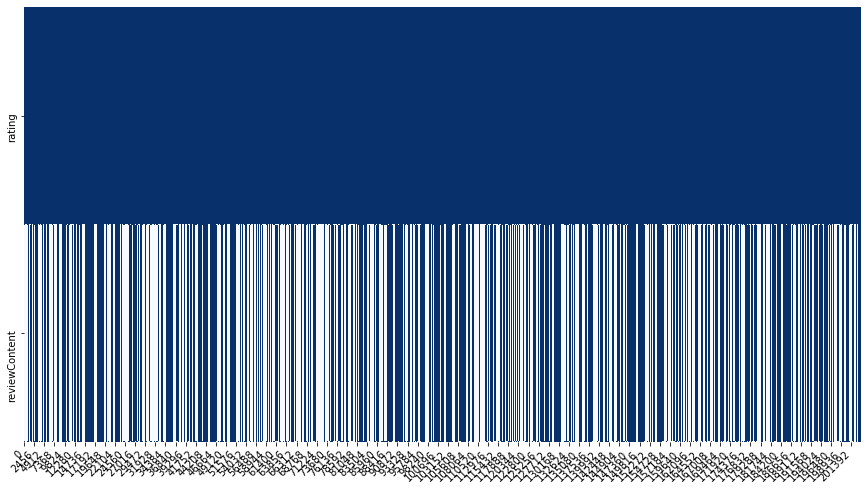

In [5]:
plot_missing_value(df_review)

In [6]:
df_review.dropna(inplace=True)
df_review.reset_index(drop=True,inplace=True)

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_review.shape

(107029, 2)

In [8]:
import nltk
import string
import re

## Make function to text preprocessing

In [9]:
a = "SAYA suka kamu!!!"

### Fungsi normalisasi

In [10]:
def lower(text):
    text = text.lower()
    return text

### menghapus tanda baca

In [11]:
def remove_punctuation(text):
    result = str.maketrans("","", string.punctuation)
    return text.translate(result)

### Remove Stopwords

In [12]:
def remove_stopwords(text):
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    stop_words_id = set(stopwords.words("indonesian"))
    word_tokens = word_tokenize(text)
    removed = []
    for t in word_tokens:
        if t not in stop_words_id:
            removed.append(t)
    removed_text = " ".join(removed)
    return removed_text

### Text Preprocessing

In [13]:
def text_preprocessing(sentence):
    text = lower(sentence)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    return text

In [14]:
clean_text= []

for i in df_review['reviewContent']:
    clean = text_preprocessing(i)
    clean_text.append(clean)

In [15]:
df_review['clean_text'] = pd.Series(clean_text,index=df_review.index)
df_review.head()

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,rating,reviewContent,clean_text
0,5,bagus mantap dah sesui pesanan,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto",bagus sesuai foto
2,5,okkkkk mantaaaaaaapppp ... goood,okkkkk mantaaaaaaapppp goood
3,4,bagus sesuai,bagus sesuai
4,1,bima,bima


In [16]:
df_review['sentimen'] = df_review['rating']
df_review['sentimen'].replace({5:'Positif',4:'Positif',3:'Netral',2:'Negatif',1:'Negatif'},inplace=True)
df_review.head()

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,rating,reviewContent,clean_text,sentimen
0,5,bagus mantap dah sesui pesanan,bagus mantap dah sesui pesanan,Positif
1,4,"Bagus, sesuai foto",bagus sesuai foto,Positif
2,5,okkkkk mantaaaaaaapppp ... goood,okkkkk mantaaaaaaapppp goood,Positif
3,4,bagus sesuai,bagus sesuai,Positif
4,1,bima,bima,Negatif


## Data Visualization

In [17]:
df_review_pos = df_review[df_review['sentimen']=='Positif']
df_review_net = df_review[df_review['sentimen']=='Netral']
df_review_neg = df_review[df_review['sentimen']=='Negatif']

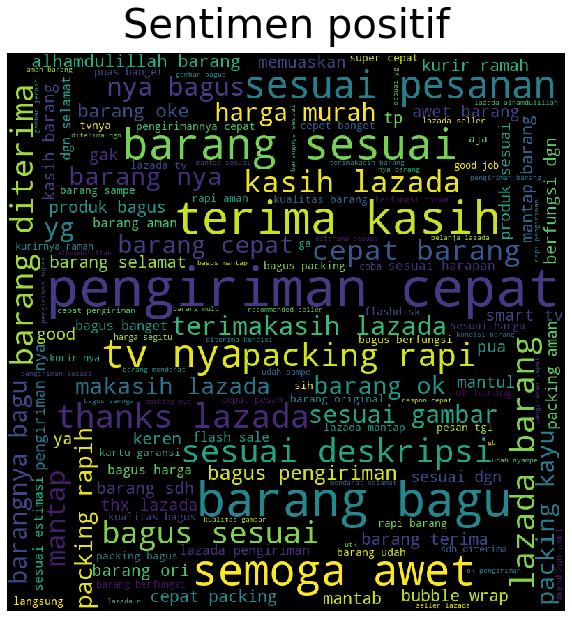

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_to_plot = ' '.join(df_review_pos['clean_text'])
wordcloud = WordCloud(width= 800,height=800,
                     background_color='black',
                     min_font_size=10).generate(word_to_plot)

plt.figure(figsize=(10,20))
plt.title('Sentimen positif',fontsize=40,pad=15)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

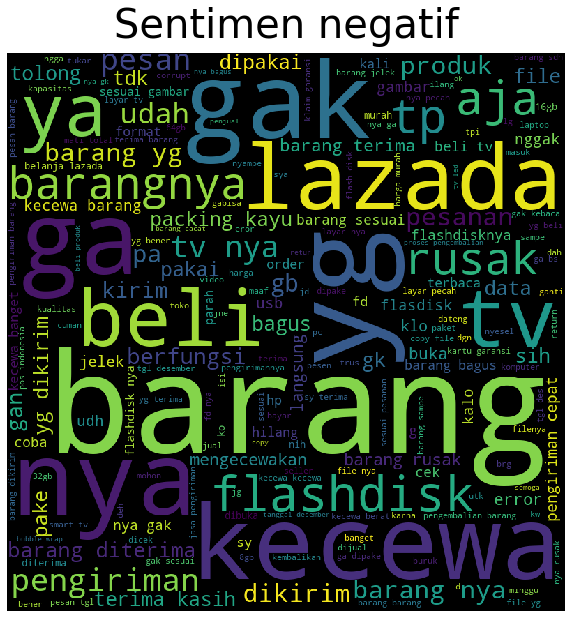

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_to_plot = ' '.join(df_review_neg['clean_text'])
wordcloud = WordCloud(width= 800,height=800,
                     background_color='black',
                     min_font_size=10).generate(word_to_plot)

plt.figure(figsize=(10,20))
plt.title('Sentimen negatif',fontsize=40,pad=15)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Dataset spliting

In [20]:
df_review.sentimen.value_counts()

Positif    93522
Negatif     9135
Netral      4372
Name: sentimen, dtype: int64

### Membuat data berjumlah sama

from sklearn.utils import resample
positif = resample(df_review_pos, 
                                 replace=True,     
                                 n_samples=10000,    
                                 random_state=123)
negatif = resample(df_review_neg, 
                                 replace=True,     
                                 n_samples=7000,    
                                 random_state=123)
netral = resample(df_review_net, 
                                 replace=True,     
                                 n_samples=4000,    
                                 random_state=123)
df_review = pd.concat([positif,negatif,netral])
df_review.sentimen.value_counts()

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_review['sentimen'] = le.fit_transform(df_review['sentimen'])

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
X = df_review['clean_text']
y = df_review['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85623,), (21406,), (85623,), (21406,))

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer().fit(X_train)
X_test= tfidf.transform(X_test)
X_train = tfidf.transform(X_train)

# Training Model

In [50]:
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix,roc_auc_score

In [51]:
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)

In [52]:
y_pred = tree.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9755208819957022
[[ 1651    16   160]
 [   16   709   149]
 [  119    64 18522]]


## Sanity check

In [43]:
review_1 = ['barang rusak, tidak sesuai dengan pesanan','barang awet, bagus']
review_1 = tfidf.transform(review_1)

In [45]:
hasil = tree.predict(review_1)
hasil

array([0, 2])

# Pipeline version